# Méthodes de recherche linéaire

Considérons $f \in C^2$.  Une méthode de descente consiste à calculer itérativement
$$
x_{k+1} = x_k + \alpha^* d_k
$$
où $\alpha^*$ minimise approximativement $f(x_k - \alpha d_k)$.

In [1]:
using LinearAlgebra
using BenchmarkTools
using Optim
using Plots

$$
f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

Son gradient peut être calculé comme

$$
\nabla f(x,y) =
\begin{pmatrix}
-2(1-x)-400x(y-x^2) \\
200(y-x^2)
\end{pmatrix}
$$

$$
\nabla^2 f(x,y) =
\begin{pmatrix}
2 - 400(y-x^2) + 800x^2 & -400x \\
-400x & 200
\end{pmatrix}
=
\begin{pmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

Le minimiseur est situé en $(1,1)$. En effet,
$$
\nabla f(1,1) = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$
et
$$
\nabla^2 f(1,1) =
\begin{pmatrix}
802 & -400 \\ -400 & 200
\end{pmatrix}
$$
Les déterminants des mineurs principaux sont positifs comme ils valent respectivement 802 et $802\times200-400^2= 400$, aussi la matrice hessienne est définie positive.

Reprenons la fonction de Rosenbrock

In [2]:
# Rosenbrock function
# Source: https://bitbucket.org/lurk3r/optim.jl

function rosenbrock(x::Vector)
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

function rosenbrock_gradient!(storage::Vector, x::Vector)
    storage[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    storage[2] = 200.0 * (x[2] - x[1]^2)
end

function rosenbrock_hessian!(storage::Matrix, x::Vector)
    storage[1, 1] = 2.0 - 400.0 * x[2] + 1200.0 * x[1]^2
    storage[1, 2] = -400.0 * x[1]
    storage[2, 1] = -400.0 * x[1]
    storage[2, 2] = 200.0
end

rosenbrock_hessian! (generic function with 1 method)

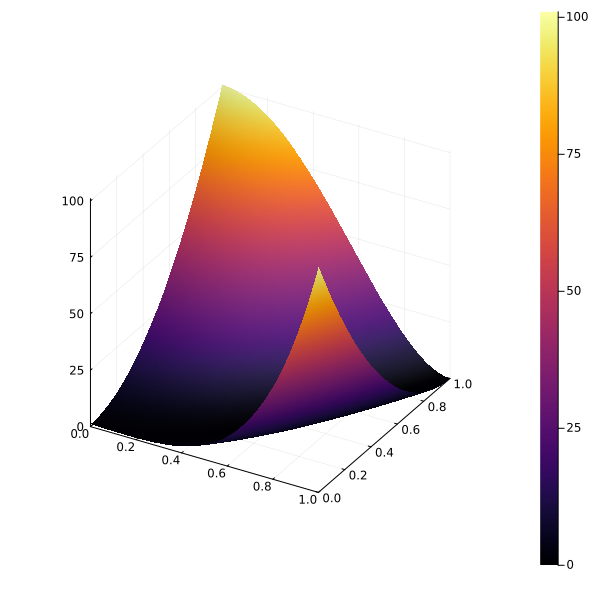

In [3]:
using Plots

default(size=(600,600))
x, y = 0:0.01:1.0, 0:0.01:1.0
z = Surface((x,y)->rosenbrock([x,y]), x, y)
surface(x,y,z, linealpha = 0.3)

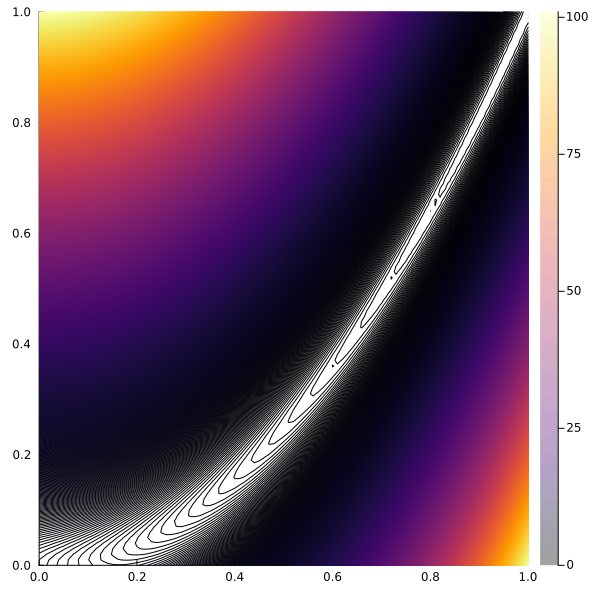

In [4]:
Plots.contour(x,y,z, linealpha = 0.1, levels=2500)

Nous pouvons résoudre le problème d'optimisation avec la fonction `optimize` présente dans la librairie `Optim.jl`:

In [5]:
res = optimize(rosenbrock, rosenbrock_gradient!,
               [20.0, 20.0],
               Optim.GradientDescent(),
               Optim.Options(g_tol = 1e-6,
                             store_trace = true,
                             show_trace = true))

Iter     Function value   Gradient norm 
     0     1.444036e+07     3.040038e+06
 * time: 0.06200003623962402
     1     2.680958e+06     8.881503e+05
 * time: 2.7279999256134033
     2     6.986401e+02     4.430920e+03
 * time: 2.7290000915527344
     3     1.422712e+01     2.423975e+02
 * time: 2.7300000190734863
     4     1.241984e+01     7.750435e-01
 * time: 2.7309999465942383
     5     1.241547e+01     1.200614e+01
 * time: 2.7330000400543213
     6     1.241110e+01     8.544267e-01
 * time: 2.7339999675750732
     7     1.241103e+01     8.557174e-01
 * time: 2.734999895095825
     8     1.241096e+01     8.544292e-01
 * time: 2.7360000610351562
     9     1.241089e+01     8.557152e-01
 * time: 2.7360000610351562
    10     1.241081e+01     8.544285e-01
 * time: 2.736999988555908
    11     1.241074e+01     8.557130e-01
 * time: 2.739000082015991
    12     1.241067e+01     8.544278e-01
 * time: 2.740999937057495
    13     1.241060e+01     8.557108e-01
 * time: 2.7420001029968

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.233906e+01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 1.04e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.09e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.26e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.88e-06 ≰ 0.0e+00
    |g(x)|                 = 8.54e-01 ≰ 1.0e-06

 * Work counters
    Seconds run:   3  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2506
    ∇f(x) calls:   2506
    ∇f(x)ᵀv calls: 0


In [6]:
res = optimize(rosenbrock, rosenbrock_gradient!,
               [20.0, 20.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-6,
                             store_trace = true,
                             show_trace = true))

Iter     Function value   Gradient norm 
     0     1.444036e+07     3.040038e+06
 * time: 0.0
     1     2.680958e+06     8.881503e+05
 * time: 0.04199981689453125
     2     6.650571e+05     5.858550e+05
 * time: 0.04199981689453125
     3     2.806304e+02     7.167345e+02
 * time: 0.042999982833862305
     4     2.794972e+02     3.772877e+01
 * time: 0.04399991035461426
     5     2.694629e+02     8.824642e+02
 * time: 0.04499983787536621
     6     2.679257e+02     1.073784e+03
 * time: 0.046000003814697266
     7     2.615432e+02     1.595776e+03
 * time: 0.046000003814697266
     8     2.480323e+02     1.178047e+03
 * time: 0.04699993133544922
     9     2.411404e+02     6.281265e+02
 * time: 0.04799985885620117
    10     2.318473e+02     2.328093e+02
 * time: 0.048999786376953125
    11     2.293179e+02     7.429504e+02
 * time: 0.04999995231628418
    12     2.271862e+02     1.282135e+03
 * time: 0.04999995231628418
    13     2.195866e+02     1.511525e+03
 * time: 0.050999879

 * Status: success

 * Candidate solution
    Final objective value:     2.349791e-21

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.38e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.38e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.48e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.48e+07 ≰ 0.0e+00
    |g(x)|                 = 1.76e-09 ≤ 1.0e-06

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    100
    f(x) calls:    289
    ∇f(x) calls:   289
    ∇f(x)ᵀv calls: 0


In [7]:
using BenchmarkTools

@benchmark res = optimize(rosenbrock, rosenbrock_gradient!,
                          [0.0, 0.0], Optim.BFGS(),
                          Optim.Options(g_tol = 1e-12, store_trace = true, show_trace = false))

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  25.100 μs …  40.182 ms  ┊ GC (min … max): 0.00% … 99.46%
 Time  (median):     57.800 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   67.277 μs ± 401.979 μs  ┊ GC (mean ± σ):  5.94% ±  0.99%

               ▆▆▇██▄▂                                          
  ▃▅▄▃▃▂▃▂▃▃▃▅████████▇▆▅▅▄▄▃▃▄▃▃▃▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  25.1 μs         Histogram: frequency by time          138 μs <

 Memory estimate: 23.39 KiB, allocs estimate: 491.

In [8]:
iter = Optim.trace(res)

101-element Vector{OptimizationState{Float64, BFGS{LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Nothing, Nothing, Flat}}}:
      0     1.444036e+07     3.040038e+06
 * time: 0.0

      1     2.680958e+06     8.881503e+05
 * time: 0.04199981689453125

      2     6.650571e+05     5.858550e+05
 * time: 0.04199981689453125

      3     2.806304e+02     7.167345e+02
 * time: 0.042999982833862305

      4     2.794972e+02     3.772877e+01
 * time: 0.04399991035461426

      5     2.694629e+02     8.824642e+02
 * time: 0.04499983787536621

      6     2.679257e+02     1.073784e+03
 * time: 0.046000003814697266

      7     2.615432e+02     1.595776e+03
 * time: 0.046000003814697266

      8     2.480323e+02     1.178047e+03
 * time: 0.04699993133544922

      9     2.411404e+02     6.281265e+02
 * time: 0.04799985885620117

     10     2.318473e+02     2.328093e+02
 * time: 0.048999786376953125

     11     2.293179e+02     7.429504e+02
 * time:

## Différentiation en Julia

Calculer le gradient et la matrice hessienne est souvent ardu, et même pour des fonctions simples, cela peut s'avérer une tâche pénible. Afin d'alléger ce coût, il est possible d'utiliser des dérivées numériques ou la différentiation automatique.

### Dérivées numériques

Des fonctions de dérivation numérique sont fournies dans la librairie `Calculus`, comme illustré ci-dessous.

In [9]:
using Calculus, LinearAlgebra
rg = Calculus.gradient(rosenbrock)

#derivative##2 (generic function with 1 method)

Évaluons la fonction de gradient, nouvellement construite, à la solution [1,1].

In [10]:
gsol = rg([1,1])

2-element Vector{Float64}:
  1.4667356107373247e-8
 -1.1102239280930583e-14

Nous sommes proches de zéro, mais il y a des erreurs d'approximation, lesquelles peuvent empêcher la convergence vers une solution correcte, ou, à tout le mois, nuire à la precision de la solution, comme

In [11]:
norm(gsol)

1.466735610737745e-8

Utilisons néanmoins cette approche avec l'algorithme de recherche linéaire.

In [12]:
storage = [0.0,0.0]
function rg!(storage::Vector, x::Vector)
    s = rg(x)
    storage[1:length(s)] = s[1:length(s)]
end

rg! (generic function with 1 method)

In [13]:
storage

2-element Vector{Float64}:
 0.0
 0.0

In [14]:
res = optimize(rosenbrock, rg!,
               [0.0, 0.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-6,
                             store_trace = true,
                             show_trace = false))

 * Status: success

 * Candidate solution
    Final objective value:     5.471408e-17

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.47e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.47e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.59e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.20e+03 ≰ 0.0e+00
    |g(x)|                 = 2.33e-09 ≤ 1.0e-06

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    16
    f(x) calls:    56
    ∇f(x) calls:   56
    ∇f(x)ᵀv calls: 0


In [15]:
@benchmark optimize(rosenbrock, rg!,
               [0.0, 0.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-6,
                             store_trace = true,
                             show_trace = false))

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  42.000 μs …  32.282 ms  ┊ GC (min … max): 0.00% … 99.40%
 Time  (median):     86.600 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   99.824 μs ± 324.701 μs  ┊ GC (mean ± σ):  3.21% ±  0.99%

  ▄█▂        ▁█▇▃▄                                              
  ███▆▃▃▃▃▃▃▂██████▇▅▄▄▄▄▅▅▆▆▆▆▆▆▆▅▅▄▄▄▃▄▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁ ▃
  42 μs           Histogram: frequency by time          209 μs <

 Memory estimate: 34.72 KiB, allocs estimate: 809.

### Différentiation automatique

Il existe cependant des méthodes qui permettent de calculer de manière exacte les dérivées.

In [16]:
using ForwardDiff

g = x -> ForwardDiff.gradient(rosenbrock, x);
H = x -> ForwardDiff.hessian(rosenbrock, x)

function g!(storage::Vector, x::Vector)
    s = g(x)
    storage[1:length(s)] = s[1:length(s)]
end

g! (generic function with 1 method)

Si nous évaluons le gradient en $(1,1)$, nous obtenons un résultat nettement plus précis.

In [17]:
g([1.0,1.0])

2-element Vector{Float64}:
 -0.0
  0.0

Y a-t-il un impact sur l'optimisation?

In [18]:
res = optimize(rosenbrock, g!,
               [0.0, 0.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-6,
                             store_trace = true,
                             show_trace = false))

 * Status: success

 * Candidate solution
    Final objective value:     7.645684e-21

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.48e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.48e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.91e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.03e+06 ≰ 0.0e+00
    |g(x)|                 = 2.32e-09 ≤ 1.0e-06

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    16
    f(x) calls:    55
    ∇f(x) calls:   55
    ∇f(x)ᵀv calls: 0


In [19]:
@benchmark res = optimize(rosenbrock, g!,
                          [0.0, 0.0],
                          Optim.BFGS(),
                          Optim.Options(g_tol = 1e-12, store_trace = true, show_trace = false))

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):   78.400 μs …  51.676 ms  ┊ GC (min … max): 0.00% … 99.20%
 Time  (median):     174.300 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   181.992 μs ± 517.748 μs  ┊ GC (mean ± σ):  2.82% ±  0.99%

               █▄     ▁ ▁▁                                       
  ▄▄▄▃▂▃▃▃▃▃▃▃▃██▆▅▇▅▆███████▆▆▆▆▅▄▅▅▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁ ▃
  78.4 μs          Histogram: frequency by time          342 μs <

 Memory estimate: 44.77 KiB, allocs estimate: 1004.

La petite taille du problème ne permet pas d'afficher une amélioration de performance, mais l'approche de différentiation automatique performera mieux que la dérivation numérique en grande dimension.

## Méthode de Newton

$$
x_{k+1} = x_k-\nabla^2 f(x_k)^{-1} \nabla f(x_k)
$$
ou
$$
\nabla^2 f(x_k) x_{k+1} = \nabla^2 f(x_k) x_k- \nabla f(x_k)
$$


La librairies `Optim.jl` possède sa propre implémentationd de la version de Newton. Pour garder le nom `Newton` disponible, nous précisons qu'une version de la méthode de Newton est disponible dans la librairie `Optim.jl` peut être appelée avec `Optim.Newton`.

In [20]:
import Optim: Newton

methods(Optim.Newton)

# 2 methods for type constructor:
 [1] Newton(; alphaguess, linesearch)
     @ C:\Users\slash\.julia\packages\Optim\mv9zc\src\multivariate\solvers\second_order\newton.jl:23
 [2] Newton(alphaguess!::IL, linesearch!::L) where {IL, L}
     @ C:\Users\slash\.julia\packages\Optim\mv9zc\src\multivariate\solvers\second_order\newton.jl:2

Nous pouvons à présent écrire notre méthode sans ambiguité.

In [21]:
function Newton(f::Function, g::Function, h:: Function, xstart::Vector;
                verbose::Bool = false, δ::Float64 = 1e-6, nmax::Int64 = 1000, record::Bool = false)

    k = 1
    x = xstart
    n = length(x)
    δ2 = δ*δ
    H = zeros(n,n)+I
    dfx = ones(n)
    
    if (verbose || record)
        fx = f(x)
        if (verbose) println("$k. f(x) = $fx, x = $x") end
    end
    
    if (record)
        iterates = [ fx x' ]
    end

    g(dfx, x)

    while (dot(dfx,dfx) > δ2 && k <= nmax)
        k += 1
        g(dfx,x)
        h(H,x)
        # Hs = dfx, x_{k+1} = x_k - s
        x -= H\dfx  # x = x - s
        if (verbose || record)
            fx = f(x)
            if (verbose) println("$k. f(x) = $fx, x = $x, ||∇f(x)|| = ", norm(dfx)) end
        end
        if (record)
            iterates = [ iterates; fx x' ]
        end
    end
    
    if (record)
        return x, iterates
    else
        return x
    end    
end

Newton

In [22]:
methods(Newton)

# 3 methods for type constructor:
 [1] Newton(; alphaguess, linesearch)
     @ C:\Users\slash\.julia\packages\Optim\mv9zc\src\multivariate\solvers\second_order\newton.jl:23
 [2] Newton(f::Function, g::Function, h::Function, xstart::Vector; verbose, δ, nmax, record)
     @ In[21]:1
 [3] Newton(alphaguess!::IL, linesearch!::L) where {IL, L}
     @ C:\Users\slash\.julia\packages\Optim\mv9zc\src\multivariate\solvers\second_order\newton.jl:2

Testons notre approche.

In [23]:
x, iter = Newton(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [-100.0,100.0], verbose = true, record = true)

1. f(x) = 9.801010201e9, x = [-100.0, 100.0]
2. f(x) = 10200.9896959674, x = [-99.99994898992475, 9999.989797984948], ||∇f(x)|| = 3.9600515196653795e8
3. f(x) = 1.0405997390386257e10, x = [0.9999473760899633, -10199.97917119076], ||∇f(x)|| = 202.00000209874983
4. f(x) = 2.7692731928427748e-9, x = [0.9999473761157568, 0.9998947549993318], ||∇f(x)|| = 4.561824469700181e6
5. f(x) = 7.668874361715257e-16, x = [0.9999999999999847, 0.9999999972306961], ||∇f(x)|| = 0.0001052471865385349
6. f(x) = 0.0, x = [1.0, 1.0], ||∇f(x)|| = 1.2384566219522363e-6
7. f(x) = 0.0, x = [1.0, 1.0], ||∇f(x)|| = 0.0


([1.0, 1.0], [9.801010201e9 -100.0 100.0; 10200.9896959674 -99.99994898992475 9999.989797984948; … ; 0.0 1.0 1.0; 0.0 1.0 1.0])

Traçons les itérations.

In [24]:
niter, d = size(iter)
df = 2
anim = @animate for i = 1:df:niter+1-df
    plot!(iter[1:i,2], iter[1:i,3], legend=false, linewidth=2, linecolor=:orange)
end

Animation("C:\\Users\\slash\\AppData\\Local\\Temp\\jl_5EPfwx", ["000001.png", "000002.png", "000003.png"])

[ Info: Saved animation to C:\Users\slash\Git\optim\NLP\iterationsRosenbrockNewton.gif


Plots.AnimatedGif("C:\\Users\\slash\\Git\\optim\\NLP\\iterationsRosenbrockNewton.gif")
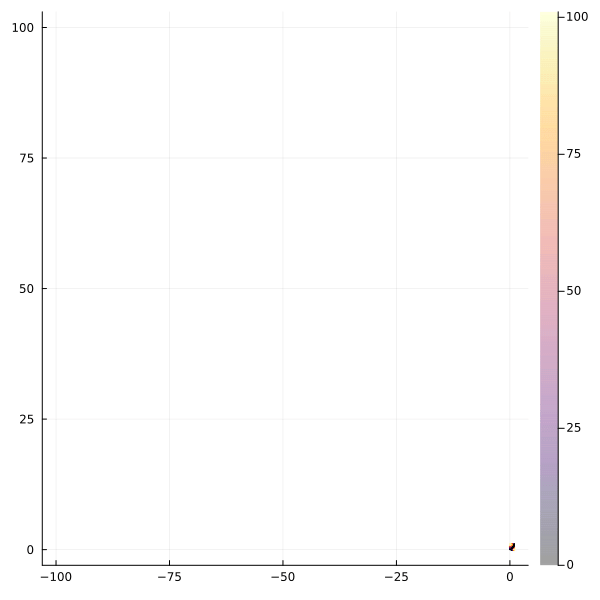

In [25]:
gif(anim, "iterationsRosenbrockNewton.gif", fps = 1)

## Implémentation d'un algorithme de recherche linéaire

Un squelette très basique d'implémentation de recherche linéaire suit.

In [26]:
function ls(f::Function, g::Function, h::Function, x0::Vector, 
            direction::Function, steplength::Function;
            δ::Float64 = 1e-6, nmax::Int64 = 1000, 
            verbose::Bool = false, record::Bool = false)
    k = 0
    x = x0
    δ2 = δ*δ
    n = length(x)
    dfx = ones(n)
    g(dfx, x)
    
    if (verbose || record)
        fx = f(x)
        if (verbose) println("$k. f(x) = $fx, x = $x") end
    end
    
    if (record)
        iterates = [ fx x' ]
    end
    
    while (dot(dfx,dfx) > δ2 && k <= nmax)
        # Compute the search direction
        d, dfx = direction(f,g,h,x)
        # Compute the step length along d
        # Pass gradient function g for Wolfe-type methods
        α = steplength(f, g, dfx, x, d)
        # Update the iterate
        x += α*d
        # Recompute gradient for next iteration
        g(dfx, x)
        k += 1
        
        if (verbose || record)
            fx = f(x)
            if (verbose) println("$k. f(x) = $fx, x = $x") end
        end
        if (record)
            iterates = [ iterates; fx x' ]
        end
    end
    
    if (record)
        return iterates
    else
        return x
    end
end

ls (generic function with 1 method)

La fonction autorise l'emploi de différentes manières de calculer la longueur de pas.

Commençons avec un pas constant.

In [27]:
# Constant step length
function constantStep(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                      α::Float64 = 0.1)
    return α
end

# Constant step with descent direction check
function constantStepSafe(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                          α::Float64 = 0.1)
    slope = dot(dfx, d)
    if slope >= 0
        @warn "d is not a descent direction (∇f·d = $slope ≥ 0), returning α = 0"
        return 0.0
    end
    return α
end

constantStepSafe (generic function with 1 method)

Nous calculons la direction de Newton avec la méthode ci-dessous.

In [28]:
function direction(f::Function, g:: Function, h:: Function, x::Vector)
    n = length(x)
    df = ones(n)
    H = zeros(n,n)+I
    g(df,x)
    h(H,x)
    return -H\df, df
end

direction (generic function with 1 method)

Testons notre méthode.

In [29]:
iterates = ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, constantStepSafe,
              verbose = true, record = true);

0. f(x) = 1.0, x = [0.0, 0.0]
1. f(x) = 0.8200000000000001, x = [0.1, 0.0]
2. f(x) = 0.7667010000000001, x = [0.13, 0.006999999999999997]
3. f(x) = 0.7164839705678224, x = [0.1591946308724832, 0.015580604026845628]
4. f(x) = 0.6690860506934094, x = [0.1876727088615721, 0.025623950900885283]
5. f(x) = 0.6243017479343785, x = [0.21549767352132176, 0.03702763335928626]
6. f(x) = 0.5819647111860691, x = [0.2427153859191641, 0.04969950215328277]
7. f(x) = 0.5419359986709369, x = [0.2693592164260235, 0.06355436300181773]
8. f(x) = 0.5040962706598394, x = [0.2954534845126422, 0.0785118286590445]
9. f(x) = 0.4683404571685393, x = [0.32101585111994546, 0.09449490251724099]
10. f(x) = 0.4345740413082412, x = [0.34605902084400614, 0.11142903881996438]
11. f(x) = 0.40271042747118224, x = [0.3705919756977332, 0.12924152019890117]
12. f(x) = 0.3726690549135953, x = [0.3946208831729017, 0.14786105001432745]
13. f(x) = 0.3443740332769405, x = [0.4181497733248137, 0.16721749198016217]
14. f(x) = 0.3177

C'est lent, mais le comportement est aussi fortement dépendant de la longueur de pas choisie.

In [30]:
function constantStepSafe2(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                          α::Float64 = 1.0)
    slope = dot(dfx, d)
    if slope >= 0
        @warn "d is not a descent direction (∇f·d = $slope ≥ 0), returning α = 0"
        return 0.0
    end
    return α
end
iterates = ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, constantStepSafe2,
              verbose = true, record = true);

0. f(x) = 1.0, x = [0.0, 0.0]
1. f(x) = 100.0, x = [1.0, 0.0]
2. f(x) = 0.0, x = [1.0, 1.0]


Nous avons été chanceux comme nous avons fait directement le pas de longueur nécessaire. En pratique, c'est impossible à déterminer, et nous voudrons des procédures automatiques.

Une approche plus pertinente est le pas d'Armijo.

In [31]:
function ArmijoStep(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                    αmax::Float64 = 1.0, β::Float64 = 0.1, κ::Float64 = 0.2,
                    maxiter::Int = 100)
    # Check descent direction
    slope = dot(dfx, d)
    if slope >= 0
        error("d is not a descent direction (∇f·d = $slope ≥ 0)")
    end
    
    s = β * slope
    α = αmax
    fx = f(x)
    
    for i in 1:maxiter
        fxcand = f(x + α * d)
        if fxcand <= fx + α * s  # Armijo condition satisfied
            return α
        end
        α *= κ
    end
    
    @warn "Armijo line search did not converge within $maxiter iterations"
    return α
end

ArmijoStep (generic function with 1 method)

In [32]:
ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, ArmijoStep, verbose = true, record = true)

0. f(x) = 1.0, x = [0.0, 0.0]
1. f(x) = 0.8000000000000003, x = [0.2, 0.0]
2. f(x) = 0.511921963115379, x = [0.2888888888888888, 0.07555555555555553]
3. f(x) = 0.4390842273746099, x = [0.3440085061137693, 0.10898269242128894]
4. f(x) = 0.3816415098916524, x = [0.3896930378275787, 0.14228625940750597]
5. f(x) = 0.3529262261065126, x = [0.5990693350037853, 0.3150456343226584]
6. f(x) = 0.12980037958858406, x = [0.6401159691444608, 0.4080636277794738]
7. f(x) = 0.09546841922521344, x = [0.6939519285954738, 0.47732310773194364]
8. f(x) = 0.07651895844005979, x = [0.7270519065070089, 0.5241119290421852]
9. f(x) = 0.05941081904167223, x = [0.8708216084062637, 0.7376605464830716]
10. f(x) = 0.010859570944339146, x = [0.8959832298498386, 0.8021528409784789]
11. f(x) = 0.007402768175497839, x = [0.9883095131727001, 0.9682315512354461]
12. f(x) = 5.4328306202653984e-5, x = [0.9926315937584335, 0.9852988005468181]
13. f(x) = 2.911652499900479e-7, x = [0.9999725735407531, 0.9998912578495525]
14. f

15×3 Matrix{Float64}:
 1.0          0.0       0.0
 0.8          0.2       0.0
 0.511922     0.288889  0.0755556
 0.439084     0.344009  0.108983
 0.381642     0.389693  0.142286
 0.352926     0.599069  0.315046
 0.1298       0.640116  0.408064
 0.0954684    0.693952  0.477323
 0.076519     0.727052  0.524112
 0.0594108    0.870822  0.737661
 0.0108596    0.895983  0.802153
 0.00740277   0.98831   0.968232
 5.43283e-5   0.992632  0.985299
 2.91165e-7   0.999973  0.999891
 8.55814e-14  1.0       0.999999

In [33]:
@benchmark ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, ArmijoStep)

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  10.100 μs … 305.600 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     19.400 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   22.153 μs ±  13.002 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▁       ▃█▅                                                  
  ▇█▄▂▂▂▂▂▄████▄▃▃▂▃▃▃▃▂▂▂▂▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  10.1 μs         Histogram: frequency by time           60 μs <

 Memory estimate: 15.05 KiB, allocs estimate: 344.

La condition d'Armijo seule ne suffit pas; il faut l'insérer dans une procédure de backtracking pertinente.

Considérons la fonction $f(x) = x^2$ et le point de départ $x_0 = 2$, la direction $d_k = -1$ et le pas $\alpha_k = 2^(-k-1)#.

In [34]:
# Code généré avec Claude.ai

function armijo_problem_demo(c1::Float64; niter::Int=20)
    # Fonction et gradient
    f(x) = x^2
    grad_f(x) = 2*x
    
    # Paramètres
    x0 = 2.0
    d = -1.0  # Direction (constante)
    
    # Stockage des résultats
    x_vals = zeros(niter + 1)
    α_vals = zeros(niter)
    armijo_satisfied = BitVector(undef, niter)
    
    x_vals[1] = x0
    x_k = x0
    
    println("Démonstration avec c₁ = $c1")
    println("─"^60)
    println("k\tα_k\t\tx_k\t\tArmijo satisfaite?")
    println("─"^60)
    
    for k in 1:niter
        # Pas fixe α_k = 2^(-k-1)
        α_k = 2.0^(-k-1)
        α_vals[k] = α_k
        
        # Nouveau point
        x_new = x_k + α_k * d
        
        # Vérification de la condition d'Armijo
        # f(x_k + α_k d_k) ≤ f(x_k) + c₁ α_k ∇f(x_k)ᵀ d_k
        lhs = f(x_new)
        rhs = f(x_k) + c1 * α_k * grad_f(x_k) * d
        
        armijo_satisfied[k] = lhs <= rhs
        
        println("$k\t$(round(α_k, digits=6))\t$(round(x_new, digits=6))\t$(armijo_satisfied[k])")
        
        x_k = x_new
        x_vals[k+1] = x_k
    end
    
    println("─"^60)
    println("Valeur finale: x = $(round(x_k, digits=8))")
    println("Optimum théorique: x* = 0")
    println("Toutes les itérations satisfont Armijo: $(all(armijo_satisfied))")
    println()
    
    return x_vals, α_vals, armijo_satisfied
end

armijo_problem_demo (generic function with 1 method)

Testons la méthode.

In [35]:
# 1. Avec c₁ très petit (problématique)
println("1️⃣  CAS PROBLÉMATIQUE: c₁ = 10⁻⁶ (TROP PETIT)")
armijo_problem_demo(1e-6, niter=15);

# 2. Avec c₁ standard
println("\n2️⃣  CAS STANDARD: c₁ = 10⁻⁴ (RECOMMANDÉ)")
armijo_problem_demo(1e-4, niter=15);

1️⃣  CAS PROBLÉMATIQUE: c₁ = 10⁻⁶ (TROP PETIT)
Démonstration avec c₁ = 1.0e-6
────────────────────────────────────────────────────────────
k	α_k		x_k		Armijo satisfaite?
────────────────────────────────────────────────────────────
1	0.25	1.75	true
2	0.125	1.625	true
3	0.0625	1.5625	true
4	0.03125	1.53125	true
5	0.015625	1.515625	true
6	0.007812	1.507812	true
7	0.003906	1.503906	true
8	0.001953	1.501953	true
9	0.000977	1.500977	true
10	0.000488	1.500488	true
11	0.000244	1.500244	true
12	0.000122	1.500122	true
13	6.1e-5	1.500061	true
14	3.1e-5	1.500031	true
15	1.5e-5	1.500015	true
────────────────────────────────────────────────────────────
Valeur finale: x = 1.50001526
Optimum théorique: x* = 0
Toutes les itérations satisfont Armijo: true


2️⃣  CAS STANDARD: c₁ = 10⁻⁴ (RECOMMANDÉ)
Démonstration avec c₁ = 0.0001
────────────────────────────────────────────────────────────
k	α_k		x_k		Armijo satisfaite?
────────────────────────────────────────────────────────────
1	0.25	1.75	true
2	0.125

Nous voyons que l'approche ne converge pas, même si nous satisfaisons la condition d'Armijo à chaque itération, et y compris avec des paramètres usuels dana la conditions d'Armijo. Il est donc important de bien l'enchâsser dans une recherche linéaire adéquate. 

## Condition de Wolfe

Note: cette section a été écrite avec l'aide de 'Claude.ai`.

Ajoutons la condition de courbure de Wolfe pour rendre l'approche plus robuste. Le pas est tout d'abord diminué jusqu'à satisfaire la condition d'Armijo:
$$
f(x+\alpha d) \leq f(x) + c_1 \alpha \nabla f(x)^T d.
$$
Si la condition de Wolfe,
$$
\nabla f(x + \alpha d )^T d \geq c_2 \nabla f(x)^T d,
$$
n'est pas satisfaite au point trouvé, $\alpha$ est augmenté.

Le processus est répété jusqu'à satisfaire les deux conditions ou atteindre le maximum d'itérations.

In [36]:
# Wolfe line search
function WolfeStep(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                   αmax::Float64 = 1.0, 
                   c1::Float64 = 1e-4,
                   c2::Float64 = 0.9,
                   maxiter::Int = 100)
    slope = dot(dfx, d)
    if slope >= 0
        error("d is not a descent direction (∇f·d = $slope ≥ 0)")
    end
    
    fx = f(x)
    α = αmax
    
    for i in 1:maxiter
        x_new = x + α * d
        fx_new = f(x_new)
        
        # Check Armijo condition
        if fx_new > fx + c1 * α * slope
            α *= 0.5
            continue
        end
        
        # Check Wolfe curvature condition
        dfx_new = zeros(length(x))
        g(dfx_new, x_new)
        slope_new = dot(dfx_new, d)
        
        if slope_new < c2 * slope
            # Curvature condition violated, try larger step
            α = min(1.5 * α, αmax)
            continue
        end
        
        # Both conditions satisfied
        return α
    end
    
    @warn "Wolfe line search did not converge within $maxiter iterations"
    return α
end

WolfeStep (generic function with 1 method)

Essayons.

In [37]:
ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, WolfeStep, verbose = true, record = true);

0. f(x) = 1.0, x = [0.0, 0.0]
1. f(x) = 0.953125, x = [0.25, 0.0]
2. f(x) = 0.48320568510897727, x = [0.3055555555555555, 0.09027777777777778]
3. f(x) = 0.4570882874038782, x = [0.5202502120441048, 0.22302327773065667]
4. f(x) = 0.18894205360765606, x = [0.5658217433554428, 0.31807748078773224]
5. f(x) = 0.13918725802656795, x = [0.7192033694950585, 0.4926891812227826]
6. f(x) = 0.05494099027886978, x = [0.7666924997212666, 0.5855621716392027]
7. f(x) = 0.029144630370679245, x = [0.8470855067578662, 0.7099632114340234]
8. f(x) = 0.009858645098334397, x = [0.90781095070357, 0.8204331426749167]
9. f(x) = 0.0023237474828217055, x = [0.9608689105452408, 0.9204539161498377]
10. f(x) = 0.00023797236330720296, x = [0.9859043250686222, 0.971380566208658]
11. f(x) = 4.92673713957957e-6, x = [0.998429868115848, 0.9967053123172016]
12. f(x) = 2.8189505454260658e-9, x = [0.9999522315160889, 0.9999021477236835]
13. f(x) = 1.0095039839287204e-15, x = [0.9999999778687031, 0.9999999534576924]


La condition forte de Wolfe modifie la condition de courbure
$$
\nabla f(x + \alpha d )^T d \geq c_2 \nabla f(x)^T d,
$$
en modifiant le terme de gauche avec l'opérateur de valeur absolue:
$$
| \nabla f(x + \alpha d )^T d | \geq c_2 \nabla f(x)^T d.
$$

La condition de Wolfe permet des pentes positives arbitrairement grandes et peut accepter des pas trop longs, tandis que la condition forte force la pente à être proche de zéro et ainsi évite à la fois les pas trop courts et trop longs.

In [38]:
# Strong Wolfe line search
function strongWolfeStep(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                         αmax::Float64 = 1.0, 
                         c1::Float64 = 1e-4,
                         c2::Float64 = 0.9,
                         maxiter::Int = 100)
    slope = dot(dfx, d)
    if slope >= 0
        error("d is not a descent direction (∇f·d = $slope ≥ 0)")
    end
    
    fx = f(x)
    α = αmax
    
    for i in 1:maxiter
        x_new = x + α * d
        fx_new = f(x_new)
        
        # Armijo condition
        if fx_new > fx + c1 * α * slope
            α *= 0.5
            continue
        end
        
        # Strong Wolfe curvature condition
        dfx_new = zeros(length(x))
        g(dfx_new, x_new)
        slope_new = dot(dfx_new, d)
        
        if abs(slope_new) <= -c2 * slope
            return α
        end
        
        # Adjust step size based on slope
        if slope_new < 0
            # Still descending
            α = min(1.5 * α, αmax)
        else
            # Started ascending
            α *= 0.5
        end
    end
    
    @warn "Strong Wolfe line search did not converge within $maxiter iterations"
    return α
end

strongWolfeStep (generic function with 1 method)

In [39]:
ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, strongWolfeStep, verbose = true, record = true);

0. f(x) = 1.0, x = [0.0, 0.0]
1. f(x) = 0.7900390625, x = [0.125, 0.0]
2. f(x) = 0.6276013061607946, x = [0.23106060606060605, 0.03432765151515151]
3. f(x) = 0.4362544539327584, x = [0.39084784264064887, 0.12723007512296283]
4. f(x) = 0.26938690675684784, x = [0.4906043171560506, 0.2307412418044127]
5. f(x) = 0.19916424518665032, x = [0.6609553354538386, 0.407842486029803]
6. f(x) = 0.08426114985611531, x = [0.7107863102127241, 0.5027340527403982]
7. f(x) = 0.04827964165103271, x = [0.8074082593927283, 0.6413307332495415]
8. f(x) = 0.018562160722560797, x = [0.8692260802844219, 0.7517325356668229]
9. f(x) = 0.006227958610288891, x = [0.943348828691387, 0.8844128307620096]
10. f(x) = 0.0009327627815845783, x = [0.9703405333420038, 0.9408321985264982]
11. f(x) = 5.9139590119154244e-5, x = [0.9962279356357931, 0.9917999421436335]
12. f(x) = 2.109976909050132e-7, x = [0.9995541786011181, 0.9990974920666914]
13. f(x) = 4.884547748060233e-12, x = [0.9999990156741099, 0.9999978334691672]
14. 

Nocedal et Wright ont affiné la méthode La différence fondamentale en cherchant un intervalle contenant le point recherché avec une garantie mathématique quand la condition d'Armijo est satisfaite ou quand la fonction prend une valeur plus élevée qu'au point de départ. La méthode réduit ensuite progressivement l'intervalle par bisection.

In [40]:
# Zoom subroutine for robust Wolfe
function zoom(f::Function, g::Function, x::Vector, d::Vector, 
              αlo::Float64, αhi::Float64, fx::Float64, slope::Float64,
              c1::Float64, c2::Float64, maxiter::Int = 20)
    
    dfx_temp = zeros(length(x))
    
    for i in 1:maxiter
        # Use bisection (could use interpolation for better performance)
        α = (αlo + αhi) / 2.0
        
        x_new = x + α * d
        fx_new = f(x_new)
        
        # Check Armijo
        fxlo = f(x + αlo * d)
        if fx_new > fx + c1 * α * slope || fx_new >= fxlo
            αhi = α
        else
            g(dfx_temp, x_new)
            slope_new = dot(dfx_temp, d)
            
            # Check strong Wolfe curvature
            if abs(slope_new) <= -c2 * slope
                return α
            end
            
            if slope_new * (αhi - αlo) >= 0
                αhi = αlo
            end
            αlo = α
        end
        
        if abs(αhi - αlo) < 1e-10
            break
        end
    end
    
    return (αlo + αhi) / 2.0
end

# Robust Wolfe with zoom
function WolfeZoomStep(f::Function, g::Function, dfx::Vector, x::Vector, d::Vector; 
                       αmax::Float64 = 1.0, 
                       c1::Float64 = 1e-4,
                       c2::Float64 = 0.9,
                       maxiter::Int = 50)
    slope = dot(dfx, d)
    if slope >= 0
        error("d is not a descent direction")
    end
    
    fx = f(x)
    α_prev = 0.0
    α = min(1.0, αmax)
    fx_prev = fx
    dfx_temp = zeros(length(x))
    
    for i in 1:maxiter
        x_new = x + α * d
        fx_new = f(x_new)
        
        # Armijo condition or function increased
        if fx_new > fx + c1 * α * slope || (i > 1 && fx_new >= fx_prev)
            return zoom(f, g, x, d, α_prev, α, fx, slope, c1, c2)
        end
        
        g(dfx_temp, x_new)
        slope_new = dot(dfx_temp, d)
        
        # Strong Wolfe satisfied
        if abs(slope_new) <= -c2 * slope
            return α
        end
        
        # Slope positive, bracket found
        if slope_new >= 0
            return zoom(f, g, x, d, α, α_prev, fx, slope, c1, c2)
        end
        
        # Increase step size
        α_prev = α
        fx_prev = fx_new
        α = min(2.0 * α, αmax)
    end
    
    @warn "Wolfe zoom line search exceeded maximum iterations"
    return α
end

WolfeZoomStep (generic function with 1 method)

Testons la nouvelle méthode.

In [41]:
iter = ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.0,0.0], direction, WolfeZoomStep, verbose = true, record = true);

0. f(x) = 1.0, x = [0.0, 0.0]
1. f(x) = 0.7900390625, x = [0.125, 0.0]
2. f(x) = 0.6276013061607946, x = [0.23106060606060605, 0.03432765151515151]
3. f(x) = 0.4362544539327584, x = [0.39084784264064887, 0.12723007512296283]
4. f(x) = 0.26938690675684784, x = [0.4906043171560506, 0.2307412418044127]
5. f(x) = 0.19916424518665032, x = [0.6609553354538386, 0.407842486029803]
6. f(x) = 0.08426114985611531, x = [0.7107863102127241, 0.5027340527403982]
7. f(x) = 0.04827964165103271, x = [0.8074082593927283, 0.6413307332495415]
8. f(x) = 0.018562160722560797, x = [0.8692260802844219, 0.7517325356668229]
9. f(x) = 0.006227958610288891, x = [0.943348828691387, 0.8844128307620096]
10. f(x) = 0.0009327627815845783, x = [0.9703405333420038, 0.9408321985264982]
11. f(x) = 5.9139590119154244e-5, x = [0.9962279356357931, 0.9917999421436335]
12. f(x) = 2.109976909050132e-7, x = [0.9995541786011181, 0.9990974920666914]
13. f(x) = 4.884547748060233e-12, x = [0.9999990156741099, 0.9999978334691672]
14. 

Nous pouvons tracer la série des itérés, illustrant la capacité de l'algorithme à suivre les courbes de niveau.

[ Info: Saved animation to C:\Users\slash\Git\optim\NLP\iterationsRosenbrockZoomWolfe.gif


Plots.AnimatedGif("C:\\Users\\slash\\Git\\optim\\NLP\\iterationsRosenbrockZoomWolfe.gif")
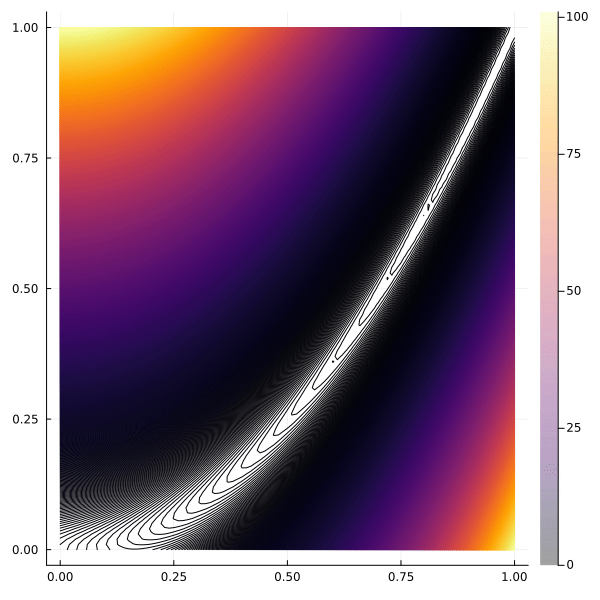

In [42]:
p = Plots.contour(0:0.01:1.0, 0:0.01:1.0,z, linealpha = 0.1, levels=2500)

niter, d = size(iter)
df = 2
anim = @animate for i = 1:df:niter+1-df
    plot!(p, iter[1:i,2], iter[1:i,3], legend=false, linewidth=2, linecolor=:orange)
end
 
gif(anim, "iterationsRosenbrockZoomWolfe.gif", fps = 5)

## Approximations de la matrice hessienne

Que se passe-t-il si on ne garde que la diagonale de la matrice hessienne?

In [43]:
function directionDiagonale(f::Function, g:: Function, h:: Function, x::Vector)
    n = length(x)
    df = ones(n)
    H = zeros(n,n)+I
    g(df,x)
    h(H,x)
    H[1,2] = H[2,1]= 0.0
    return -H\df, df
end

directionDiagonale (generic function with 1 method)

In [44]:
iter = ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.1,0.1], directionDiagonale,
          WolfeZoomStep, verbose = true, record = true);

0. f(x) = 1.62, x = [0.1, 0.1]
1. f(x) = 1.2010246613060642, x = [-0.055769230769230765, 0.0325]


LoadError: d is not a descent direction

L'algorithme s'arrête car une des directions produites n'est pas une direction de descente. Nous allons régulariser la matrice pour qu'elle soit définie positive.

In [45]:
function directionDiagonaleRegularisee(f::Function, g:: Function, h:: Function, x::Vector)
    n = length(x)
    df = ones(n)
    H = zeros(n,n)+I
    g(df,x)
    h(H,x)
    H[1,2] = H[2,1]= 0.0
    H += eigmin(H)*I
    return -H\df, df
end


directionDiagonaleRegularisee (generic function with 1 method)

In [46]:
iter = ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.1,0.1], direction_diagonaleRegularisee,
          WolfeZoomStep, verbose = true, record = true);

LoadError: UndefVarError: `direction_diagonaleRegularisee` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Nous avons perdu beaucoup en convergence, reflétant le caractère courbé des courbes de niveau, comme nous pouvons le voir visuellement.

[ Info: Saved animation to C:\Users\slash\Git\optim\NLP\iterationsRosenbrockDiagonal.gif


Plots.AnimatedGif("C:\\Users\\slash\\Git\\optim\\NLP\\iterationsRosenbrockDiagonal.gif")
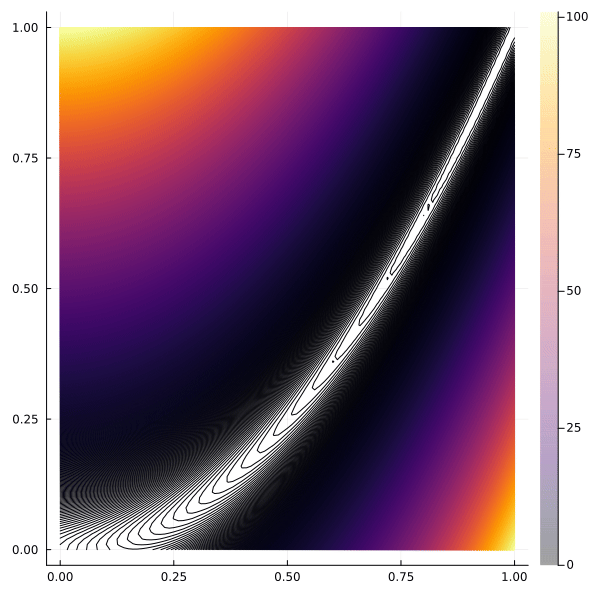

In [47]:
anim_path = "iterationsRosenbrockDiagonal.gif"
force_regenerate = false
if force_regenerate || !isfile(anim_path)
    p = Plots.contour(0:0.01:1.0, 0:0.01:1.0,z, linealpha = 0.1, levels=2500)
    df = 2
    niter, d = size(iter)
    anim = @animate for i = 1:df:niter+1-df
        plot!(p, iter[1:i,2], iter[1:i,3], legend=false, linecolor=:blue3)
    end

    gif(anim, anim_path, fps=30)
else
    println("Animation already exists at $anim_path")
end

## Approximations de matrice hessienne

### Mise à jour BFGS

En supposant que $B_k$ est une matrice symétrique définie positive, la mise à jour BFGS est définie comme
$$
B_{k+1} = B_k - \frac{B_ks_ks_k^T B_k}{s_k^T B_k s_k} + \frac{y_ky_k^T}{s_k^Ty_k}
$$
où $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$ and $s_k = x_{k+1} - x_k$.
Son implémentation de Julia est directe.

Nous créons deux fonctions, une qui crée une nouvelle matrice, et une qui surcharge  une matrice existante.

In [48]:
function BFGSUpdate(B, y, s)
    Bs = B*s
    return B - (Bs*Bs')/dot(s, Bs) + (y*y')/dot(s,y)
end

BFGSUpdate (generic function with 1 method)

In [49]:
function BFGSUpdate!(B, y, s)
    Bs = B*s
    B[:,:] = B - (Bs*Bs')/dot(s, Bs) + (y*y')/dot(s,y)
end

BFGSUpdate! (generic function with 1 method)

Essayons.

In [50]:
n = 3
y = [ 1.0 2 3]'
s = [ 0.5 0.5 0.5 ]'

B = zeros(n,n)+I
BFGSUpdate(B, y, s)

B

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [51]:
BFGSUpdate!(B, y, s)
B

3×3 Matrix{Float64}:
 1.0       0.333333  0.666667
 0.333333  2.0       1.66667
 0.666667  1.66667   3.66667

Il est cependant souvent plus intéressant de travailler avec l'inverse de la matrice hessienne. Une dérivation technique donne
$$
B_{k+1}^{-1} = \left(I - \frac{s_ky_k^T}{s_k^T y_k} \right) B_k^{-1} \left( I - \frac{y_ks_k^T}{y_k^Ts_k} \right) + \frac{s_k s_k^T}{y_k^Ts_k}
$$
L'implémentation Julia correspondante suit.

In [52]:
function InvBFGSUpdate_naive(invB::Matrix, y::Vector, s::Vector)
    ys = dot(y, s)
    A = I-(s*y')/ys
    return A*invB*A' + (s*s')/ys         
end

InvBFGSUpdate_naive (generic function with 1 method)

Cette implémentation est cependant inefficace comme elle implique une matrice temporaire. Nous pourrions l'éviter en réorganisant les termes, considérant que $B_{k}^{-1}$ est symétrique, et que $y_{k}^{T}B_k^{-1}y_k$ ainsi que $s_k^Ty_k$ sont des scalaires. Ceci conduit à
$$
B_{k+1}^{-1} = B_{k}^{-1} + \frac{(s_k^Ty_k+y_k^TB_{k}^{-1}y_k)s_ks_k^T}{(s_k^Ty_k)^2} -
\frac{B_k^{-1}y_ks_k^T + s_ky_k^TB_k^{-1}}{s_k^Ty_k}
$$
L'implémentation Julia correspondante est

In [53]:
function InvBFGSUpdate(invB::Matrix, y::Vector, s::Vector)
    ys = dot(y, s)
    invBy = invB*y
    return invB+1.0/ys*((ys+dot(y, invBy))/ys*(s*s') - invBy*s' - s*invBy')
end

InvBFGSUpdate (generic function with 1 method)

### Illustration

In [54]:
n = 2
B = invB = zeros(n,n)+I
n, m = size(B)

s = [-1.75,-0.75]
y = [-8.5,-5.0]

Bp = BFGSUpdate(B, y, s)

2×2 Matrix{Float64}:
 4.03437  1.91981
 1.91981  2.18711

In [55]:
inv(Bp)

2×2 Matrix{Float64}:
  0.425679  -0.373654
 -0.373654   0.785212

In [56]:
invBp = InvBFGSUpdate_naive(invB, y, s)

2×2 Matrix{Float64}:
  0.425679  -0.373654
 -0.373654   0.785212

In [57]:
invBp = InvBFGSUpdate(invB, y, s)

2×2 Matrix{Float64}:
  0.425679  -0.373654
 -0.373654   0.785212

In [58]:
@benchmark InvBFGSUpdate_naive(invB, y, s)

BenchmarkTools.Trial: 10000 samples with 207 evaluations per sample.
 Range (min … max):  317.874 ns … 150.149 μs  ┊ GC (min … max):  0.00% … 99.39%
 Time  (median):     517.874 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):   803.842 ns ±   3.628 μs  ┊ GC (mean ± σ):  23.26% ±  5.47%

    ▅█▆▁                                                         
  ▂▇████▅▄▃▃▃▄▇▇▆▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  318 ns           Histogram: frequency by time         1.77 μs <

 Memory estimate: 896 bytes, allocs estimate: 16.

In [59]:
@benchmark InvBFGSUpdate(invB, y, s)

BenchmarkTools.Trial: 10000 samples with 200 evaluations per sample.
 Range (min … max):  383.500 ns … 233.163 μs  ┊ GC (min … max):  0.00% … 99.51%
 Time  (median):     807.500 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.065 μs ±   4.502 μs  ┊ GC (mean ± σ):  18.70% ±  4.82%

   ▁        ▇██▆▆▅▅▃▄▁                                           
  ▄█▇▅▄▃▃▃▃▅███████████▆▅▄▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  384 ns           Histogram: frequency by time         2.13 μs <

 Memory estimate: 976 bytes, allocs estimate: 18.

Une fois encore, Julia semble déjouer nos attentes, mais il s'agit surtout d'un effet dû à la dimension. Augmentons donc celle-ci.

In [60]:
n = 1000
B = invB = zeros(n,n)+I
n, m = size(B)
s = rand(n)
y = 10 * rand(n)

A1 = InvBFGSUpdate_naive(invB, y, s)

@benchmark InvBFGSUpdate_naive(invB, y, s)

BenchmarkTools.Trial: 43 samples with 1 evaluation per sample.
 Range (min … max):   77.690 ms … 661.528 ms  ┊ GC (min … max):  0.00% … 87.10%
 Time  (median):      93.406 ms               ┊ GC (median):    12.96%
 Time  (mean ± σ):   116.896 ms ±  87.998 ms  ┊ GC (mean ± σ):  20.94% ± 14.76%

  ▇█                                                             
  ██▇▇█▆▁▃▁▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃ ▁
  77.7 ms          Histogram: frequency by time          662 ms <

 Memory estimate: 61.04 MiB, allocs estimate: 24.

In [61]:
A2 = InvBFGSUpdate(invB, y, s)

@benchmark InvBFGSUpdate(invB, y, s)

BenchmarkTools.Trial: 98 samples with 1 evaluation per sample.
 Range (min … max):  26.897 ms … 86.972 ms  ┊ GC (min … max):  0.00% … 44.56%
 Time  (median):     46.176 ms              ┊ GC (median):    32.19%
 Time  (mean ± σ):   51.159 ms ± 15.000 ms  ┊ GC (mean ± σ):  28.34% ± 11.94%

         █▂▄▂    ▄▂▄                      ▄                    
  ▄▁▁▁▄▄▄████▄▆▆▆███▆▆▄█▆▁▆▁▆▁▁▄▁▆▆▆▁██▄▁██▁▁▆█▄▁▄█▁▁▄▁▄▄▄▁▄▄ ▁
  26.9 ms         Histogram: frequency by time        83.5 ms <

 Memory estimate: 61.04 MiB, allocs estimate: 27.

In [62]:
norm(A1-A2)

9.305950773419962e-15

### Mise à jour SR1

Adapté de https://en.wikipedia.org/wiki/Symmetric_rank-one

$$
B_{k+1} = B_{k} + {\frac {(y_{k}-B_{k}s_{k})(y_{k}-B_{k}s_{k})^{T}}{(y_{k}-B_{k}s_{k})^{T}s_k}},
$$
où $y_k = \nabla f(x_{\rm cand}) - \nabla f(x_k)$ et $s_k = x_{\rm cand} - x_k$.

Ici $B_k$ n'est pas nécessairement définie positive.

Le mise à jour correspondante de l'approximation  de l'inverse de la matrice hessienne, $H_{k}=B_{k}^{-1}$, est
$$
H_{k+1}=H_{k}+{\frac{(s_{k}-H_{k}y_{k})(s_{k}-H_{k}y_{k})^{T}}{(s_{k}-H_{k}y_{k})^{T}y_{k}}}.
$$
La formule SR1 a été redécouverte à diverses reprises. Un inconvénient est que le dénominateur peut s'annuler ou être réduit à une quantité négligeable. Certains auteurs suggèrent que la mise à jour ne soit appliqués que si
$$
|s_{k}^{T}(y_{k}-B_{k}s_{k})|\geq r\|s_{k}\|\|y_{k}-B_{k}s_{k}\|,
$$
où $r \in (0,1)$ est un nombre petit, e.g. $10^{-8}$.